In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Feature Engineering for Continuous Variables
In this notebook we will cover scaling, transformations, and interactive features. This notebook is the This is a companion workbook for the 365 Data Science course on ML Process. The in-depth explanantions theories and pros/cons for each of these techniques can be found there.

## Feature Scaling
Feature scaling is important for we are using models with a distance metric. If our features are of different scales, they can be overcompensated for in the models.
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler
## Transformations
- Logarithmic
- Square Root
- Exponential
- Box-Cox
## Interaction Features
- Arethmetic Interaction
- Binning
- Creative Features

This a companion notebook for the **365 Data Science Course "Machine Learning Process A-Z"**. In the course, there is a video walkthrough of this notebook as well as theory and definitions of each of the techinques. We've designed this notebook to be a stand alone learning tool, but if you're interested in the additional features of the paid course, you can access it at a discount here: https://365datascience.com/courses/learn-machine-learning-process-a-z/


## Load Data

Next, we'll need to load our AirBnb dataset.

In [2]:
df = pd.read_csv("./data/vehicles_sample.csv")

In [3]:
df.shape

(20000, 26)

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7314973697,https://reno.craigslist.org/cto/d/hayward-2006...,reno / tahoe,https://reno.craigslist.org,14500,2006.0,chevrolet,c4500 kodiak,good,NaN,...,NaN,NaN,white,https://images.craigslist.org/00r0r_2PNOZAxrzS...,2006 Chevy c4500 Duramax Diesel 12ft stake be...,NaN,ca,37.633200,-122.09710,2021-04-30T12:36:10-0700
1,7313530720,https://okaloosa.craigslist.org/ctd/d/crestvie...,okaloosa / walton,https://okaloosa.craigslist.org,9999,2011.0,volvo,s80 3.2,excellent,6 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00t0t_6N46hVKcxz...,"WE ARE SELLING A 2011 VOLVO S80 4 DOOR SEDAN, ...",NaN,fl,30.742272,-86.56392,2021-04-27T15:46:02-0500
2,7316418589,https://portland.craigslist.org/clk/cto/d/vanc...,portland,https://portland.craigslist.org,2250,2004.0,cadillac,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_5NLY3gG93F...,2004 Cadillac Deville runs and drives excell...,NaN,or,45.664400,-122.52120,2021-05-03T13:44:57-0700
3,7314880218,https://sanantonio.craigslist.org/ctd/d/san-an...,san antonio,https://sanantonio.craigslist.org,9899,2013.0,volkswagen,tiguan,NaN,4 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00X0X_jqyuALGnjG...,You can now complete your application online o...,NaN,tx,29.387500,-98.52450,2021-04-30T12:02:38-0500
4,7316717517,https://sarasota.craigslist.org/cto/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,1995,2006.0,nissan,quest,good,6 cylinders,...,NaN,mini-van,silver,https://images.craigslist.org/00e0e_eHHYRRAIqZ...,Clear title. 2006 Nissan Quest. 6 cylnder 3.5 ...,NaN,fl,27.336900,-82.51280,2021-05-04T10:58:16-0400


In [5]:
#let's add a column for car age that will help us later on:
df['car_age'] = df['year'].max() - df['year']

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'car_age'],
      dtype='object')

In [7]:
df.describe()
# Columns we may want to normalize
# Price, Year, Odometer

,id,price,year,odometer,county,lat,long,car_age
count,2.000000e+04,2.000000e+04,19951.000000,1.981400e+04,0.0,19702.000000,19702.000000,19951.000000
mean,7.311462e+09,1.761475e+04,2011.217282,9.865501e+04,NaN,38.483050,-94.647057,10.782718
std,4.484711e+06,1.998158e+04,9.575279,2.363314e+05,NaN,5.889468,18.358730,9.575279
min,7.217189e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-56.527029,-159.365530,0.000000
25%,7.308054e+09,5.950000e+03,2008.000000,3.747300e+04,NaN,34.610000,-111.937599,5.000000
50%,7.312474e+09,1.385000e+04,2014.000000,8.400000e+04,NaN,39.140834,-88.230050,8.000000
75%,7.315259e+09,2.659000e+04,2017.000000,1.323340e+05,NaN,42.370000,-80.705055,14.000000
max,7.317096e+09,1.234567e+06,2022.000000,1.000000e+07,NaN,64.878089,94.163200,122.000000


In [8]:
#let's just use a few features to create an example model and remove Nulls. Learn mnore about different imputation techniques in this other companion notebook.
#pd.get_dummie() creates dummy variables for the categorical features (see this notebook for more on that)
df_example = pd.get_dummies(df.loc[:,['price','car_age','odometer','manufacturer','condition']].dropna())


In [9]:
from sklearn.model_selection import train_test_split

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

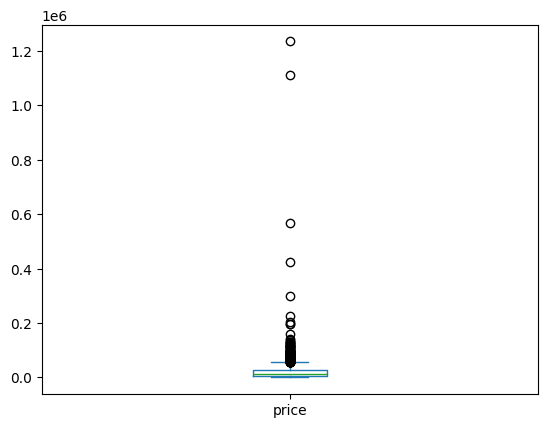

In [10]:
df.price.plot.box()

<AxesSubplot:>

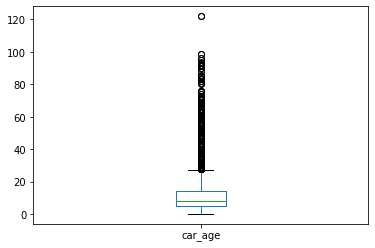

In [ ]:
#df.price.plot.box()
df.car_age.plot.box()
#df.odometer.plot.box()

<Axes: >

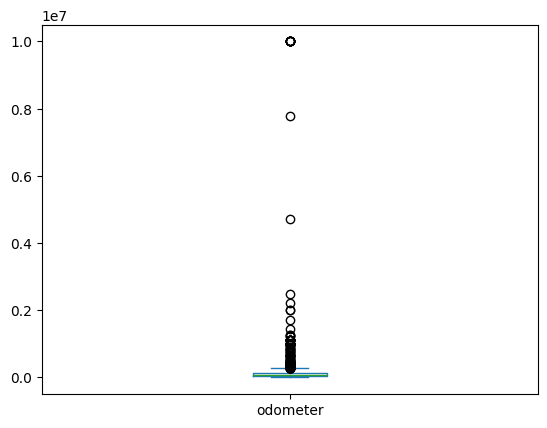

In [11]:
df.odometer.plot.box()

# Feature Scaling
Feature scaling is important for we are using models with a distance metric. If our features are of different scales, they can be overcompensated for in the models.
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler


## Absolute Maximum Scaling
Absolute maximum scaling will have you take the maximum value within the data and then divide the raw data by this absolute maximum value.

For absolute max scaling, this works best if our data doesn't have massive outliers. In this case, we would likely want to remove outliers from price and odometer. This also keeps the same distribution of the data. For absolute maximum scaling, let's do this on the year data for the cars.

In [12]:
from sklearn.preprocessing import MaxAbsScaler

#Scale data
df_am = MaxAbsScaler().fit_transform(X_train)

#convert to dataframe to see table
df_am = pd.DataFrame(df_am, columns = X_train.columns)

#obvious problems with outliers regarding price & odometer

# Min Max Scaling
Another simple form of scaling is called min max. Min Max scaling will scale all our data points between 0 and 1. We’d use the following formula to scale our data, where we subtract the min from the raw data and then divide it by the max minus the min.

Again, this approach is not robust to outliers.

In [13]:
from sklearn.preprocessing import MinMaxScaler
df_min_max = MinMaxScaler().fit_transform(X_train)
df_min_max = pd.DataFrame(df_min_max, columns = X_train.columns)

# Z Score Normalization (Standard Scaling)

Another approach is standardization which transforms the data into the z-score, where the mean is zero and the standard deviation is 1.

This approach is more robust to outliers, but still can have issues if outliers cause massive changes to standard deviation. However, this does assume a normal distribution which is inaccurate for some of our data (Year).

In [14]:
from sklearn.preprocessing import StandardScaler
df_std = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories
df_std.loc[:,['car_age','odometer']] = StandardScaler().fit_transform(df_std.loc[:, ['car_age','odometer']])
df_std

,car_age,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
19957,-0.811799,-0.117860,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5329,-0.004209,-0.280691,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
10075,-0.912748,-0.340444,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6175,0.803380,0.161998,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
270,-0.105158,0.167637,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,0.197688,0.109031,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9118,0.096739,-0.081562,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9457,-1.013696,-0.388720,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1536,-0.105158,-0.069475,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Robust Scaler
With Robust Scaler, we’re subtracting the median and then scaling the column by the IQR.

This is the approach most robust to outliers that we will cover.

In [15]:
from sklearn.preprocessing import RobustScaler
df_rob = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories
df_rob.loc[:,['car_age','odometer']] = RobustScaler().fit_transform(df_rob.loc[:, ['car_age','odometer']])
df_rob

,car_age,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
19957,-0.666667,-0.136240,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5329,0.222222,-0.533440,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
10075,-0.777778,-0.679198,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6175,1.111111,0.546431,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
270,0.111111,0.560186,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,0.444444,0.417227,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9118,0.333333,-0.047696,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9457,-0.888889,-0.796959,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1536,0.111111,-0.018211,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [17]:
#let's do a simple exmaple where we compare results with the different features scaling techniques. We will remove the categorical data for this.

#the model we will be using is K Nearest Neighbors which can use euclidean distance.

#we will use year and odometer to predict price

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#noscaling
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(X_train.loc[:,['car_age','odometer']], y_train)
pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#absolute max
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(df_am.loc[:,['car_age','odometer']], y_train)
am_pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#min max (should get same results)
neigh_mm = KNeighborsRegressor(n_neighbors=3)
neigh_mm.fit(df_min_max.loc[:,['car_age','odometer']], y_train)
mm_pred = neigh_mm.predict(X_test.loc[:,['car_age','odometer']])

#standard (z score)
neigh_std = KNeighborsRegressor(n_neighbors=3)
neigh_std.fit(df_std.loc[:,['car_age','odometer']], y_train)
std_pred = neigh_std.predict(X_test.loc[:,['car_age','odometer']])

#robust scaler
neigh_rob = KNeighborsRegressor(n_neighbors=3)
neigh_rob.fit(df_rob.loc[:,['car_age','odometer']], y_train)
rob_pred = neigh_rob.predict(X_test.loc[:,['car_age','odometer']])



In [18]:
print('No Scaling: %.3f' % mean_absolute_error(y_test,pred))
print('Abosolute Max Score: %.3f' % mean_absolute_error(y_test,am_pred))
print('Min Max Score: %.3f' % mean_absolute_error(y_test,mm_pred))
print('Standard Scaling Score: %.3f' % mean_absolute_error(y_test,std_pred))
print('Robust Scaler Score: %.3f' % mean_absolute_error(y_test,rob_pred))


No Scaling: 8036.668
Abosolute Max Score: 13113.539
Min Max Score: 13113.539
Standard Scaling Score: 13179.587
Robust Scaler Score: 13279.177


# Transformations
A data transformation is the process of using a math expression to change the structure of our data. As we mentioned before, some models need data to fit a specific type of distribution for them to produce optimal results. Unfortunately, the data we get in the real world, doesn’t always fit the distributions our models call for.

Let's look at the shape of our data and if it has any outliers before we do our transforms

max odometer: 10000000.0
median odometer: 80652.0


<Axes: >

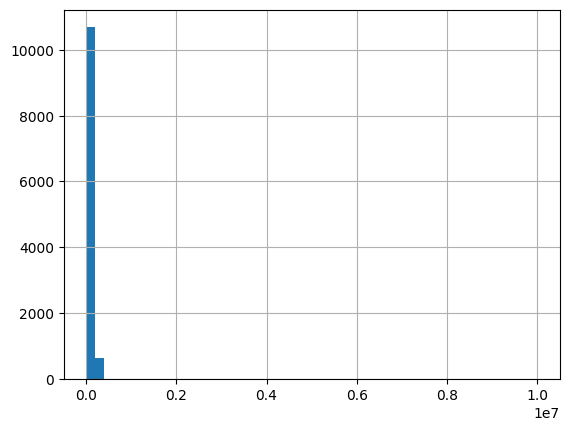

In [20]:
# visual of the distribution of the odometer without any outlier removal (see boxplots above)
#data is clearly impacted heavily by outliers
print("max odometer: " + str(df_example['odometer'].max()))
print("median odometer: " + str(df_example['odometer'].median()))

df_example['odometer'].hist(bins=50)


/var/folders/35/6ks83txd0rl3_ppmq7f__mz40000gq/T/ipykernel_51625/670153404.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_example[df['odometer']<df['odometer'].quantile(.99)]['odometer'].hist(bins=50)


<Axes: >

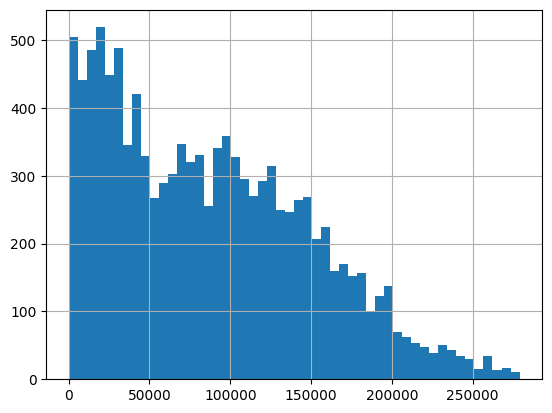

In [21]:
#shape of the data after very basic oultier removal (kept only data < 99th percentile)
#clear right skew in data
df_example[df['odometer']<df['odometer'].quantile(.99)]['odometer'].hist(bins=50)

max price: 204999
median price: 14590.0


<Axes: >

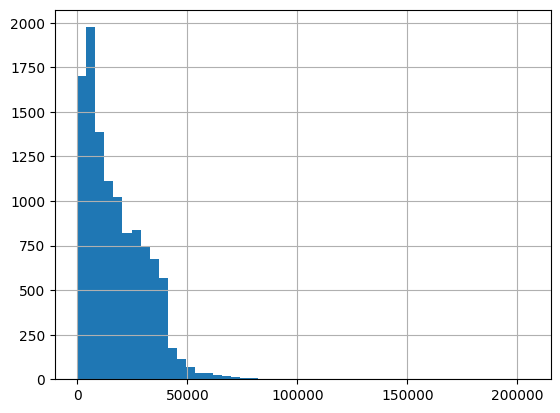

In [22]:
# visual of the distribution of the odometer without any outlier removal (see boxplots above)
#data is clearly impacted heavily by outliers
print("max price: " + str(df_example['price'].max()))
print("median price: " + str(df_example['price'].median()))

df_example['price'].hist(bins=50)

/var/folders/35/6ks83txd0rl3_ppmq7f__mz40000gq/T/ipykernel_51625/326939089.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_example[df['price']<df['price'].quantile(.99)]['price'].hist(bins=50)


<Axes: >

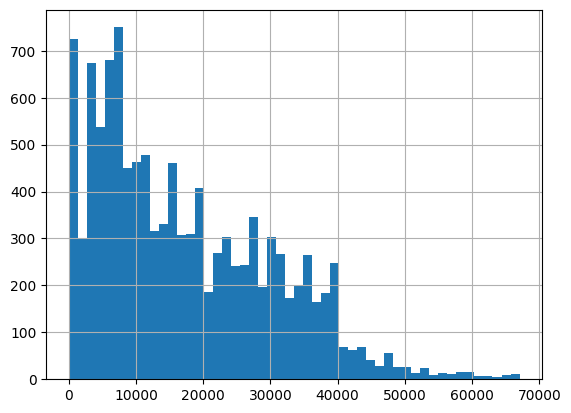

In [23]:
#shape of the data after very basic oultier removal (kept only data < 99th percentile)
#clear right skew in data

df_example[df['price']<df['price'].quantile(.99)]['price'].hist(bins=50)

max age: 122.0
median age: 113.0


<Axes: >

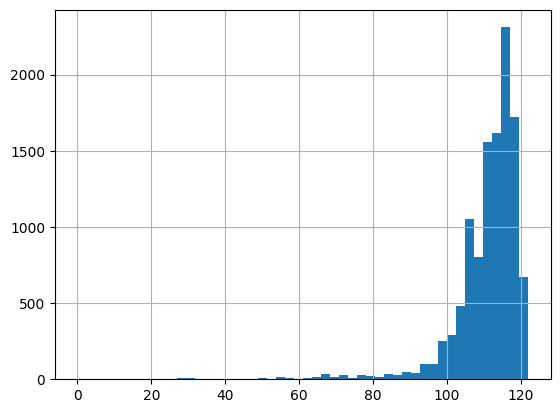

In [24]:
# Let's do some simple feature engineering to get how old the cars are

df_example['car_age'] = df_example['car_age'].max() - df_example['car_age']

print("max age: " + str(df_example['car_age'].max()))
print("median age: " + str(df_example['car_age'].median()))

df_example['car_age'].hist(bins=50)

# Logarithmic Transformation
A very popular, common type of transformation is the log transformation. Log transformations fall under the family of power transformations. Typically, we apply logarithmic transformations to our variables when our variables are heavily right skewed, driven by a few outliers.

Let's see how these transformations impact some of our skewed data (Odometer & Price)

### Transforms we will cover
- Logarithmic
- Exponential
- Square Root
- Box-Cox

In [25]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

transformer_log = FunctionTransformer(log_transform)
transformed_log = transformer_log.fit_transform(X_train)

In [26]:
transformer_logp = FunctionTransformer(log_transform)
transformed_logp = transformer_logp.fit_transform(y_train)

<Axes: >

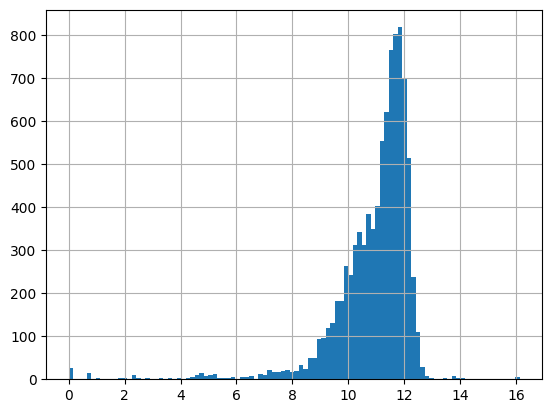

In [27]:
#as you can see, using log transform in this case actually creates some right skew.
#It does however almost completely normalize the outliers that were present

transformed_log['odometer'].hist(bins = 100)

<Axes: >

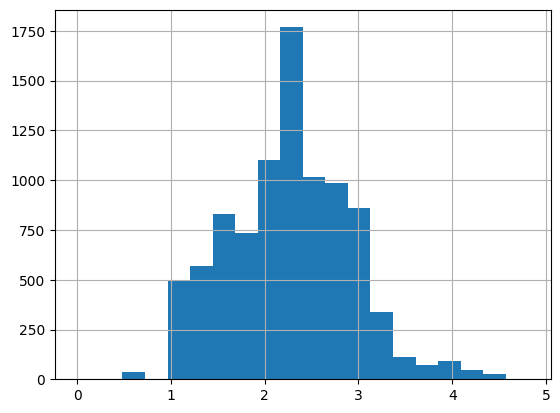

In [28]:
transformed_log['car_age'].hist(bins = 20)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

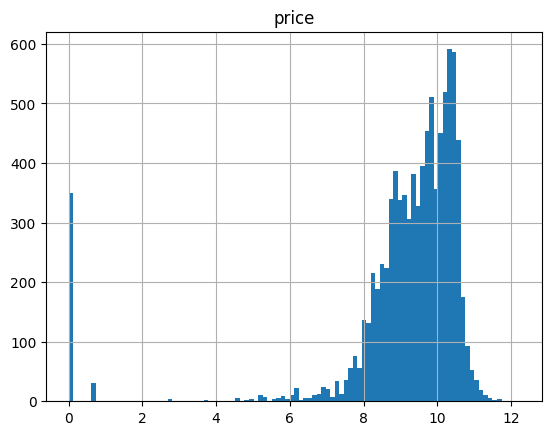

In [29]:
#as you can see, using log transform in this case actually creates some right skew.
#It does however almost completely normalize the outliers that were present

transformed_logp.hist(bins =100)

# Square Root Transform
Square/Square Root transformations will compress the spread of your larger values but spread out your lower values. Log transformations have a similar effect but are much more aggressive

In [30]:
def sqrt_transform(x):
    return np.sqrt(x)

transformer_sqrt = FunctionTransformer(sqrt_transform)
transformed_sqrt = transformer_sqrt.fit_transform(X_train)

In [31]:
transformer_sqrtp = FunctionTransformer(sqrt_transform)
transformed_sqrtp = transformer_sqrtp.fit_transform(y_train)

<Axes: >

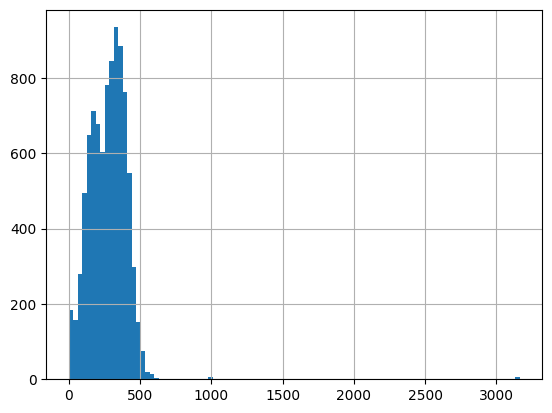

In [32]:
transformed_sqrt['odometer'].hist(bins = 100)

<Axes: >

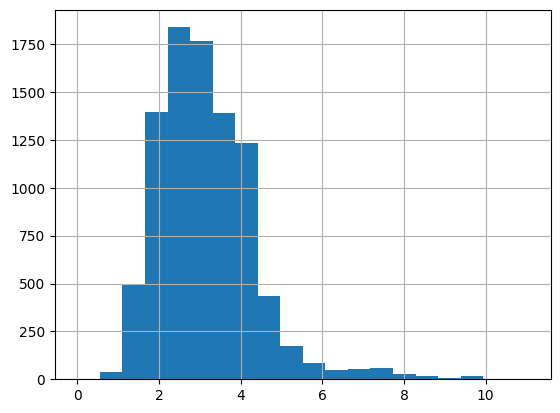

In [33]:
transformed_sqrt['car_age'].hist(bins = 20)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

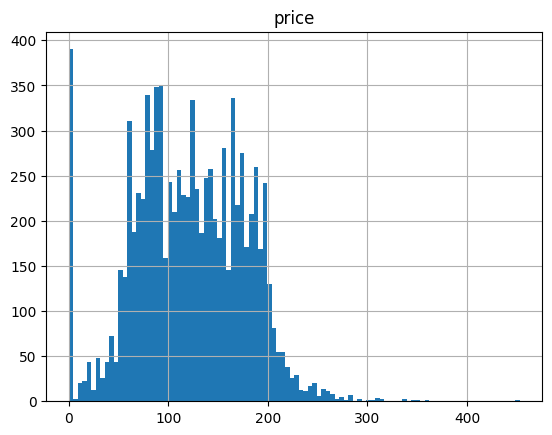

In [34]:
transformed_sqrtp.hist(bins = 100)

In [35]:
transformer_sqrtp = FunctionTransformer(sqrt_transform)
transformed_sqrtp = transformer_sqrtp.fit_transform(y_train[y_train['price'] < y_train['price'].quantile(.99)])

array([[<Axes: title={'center': 'price'}>]], dtype=object)

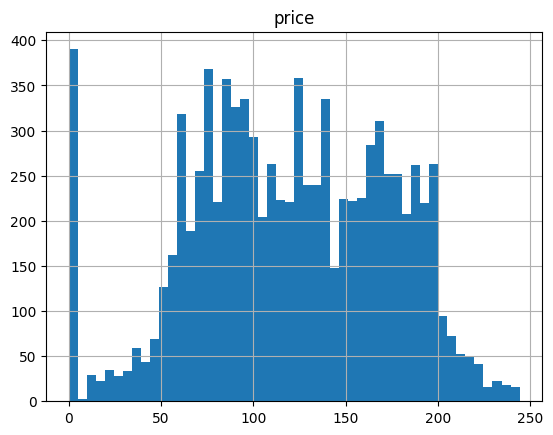

In [36]:
transformed_sqrtp.hist(bins=50)

# Exponential Transformation
A close cousin of the log transform is the exponential transformation. There are many instances where you'd use an exponential transform:
- Anytime you apply a log transform to your target variable, you can apply an exponential transformation to revert it back to the original value.
- Log and Exponential transformations are the inverse of each other. You can use either to perform the same task. Whether you want a log-linear or linear-log model.
- Use Exponential transformations when you wanto magnify small differences.

In [37]:
def exp_transform(x):
    return np.exp(x)

transformer_exp = FunctionTransformer(exp_transform)

## In our dataset, car age may be something we want to magnify
transformed_exp = X_train.copy()

transformed_exp['car_age'] = transformer_exp.fit_transform(transformed_exp['car_age'])

(array([6.284e+03, 2.318e+03, 2.600e+02, 7.800e+01, 8.300e+01, 3.500e+01,
        1.100e+01, 1.700e+01, 2.000e+00, 1.000e+00]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

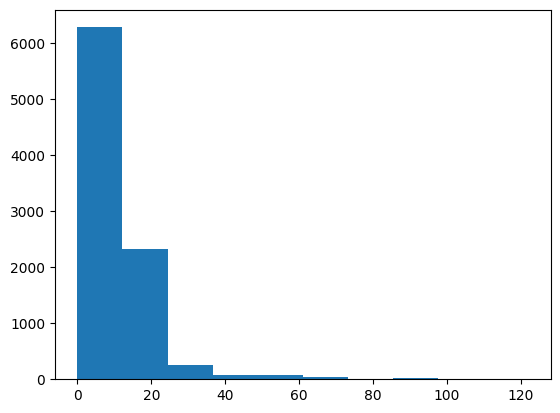

In [38]:
plt.hist(X_train['car_age'])

(array([9.088e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 9.63666567e+51, 1.92733313e+52, 2.89099970e+52,
        3.85466627e+52, 4.81833284e+52, 5.78199940e+52, 6.74566597e+52,
        7.70933254e+52, 8.67299911e+52, 9.63666567e+52]),
 <BarContainer object of 10 artists>)

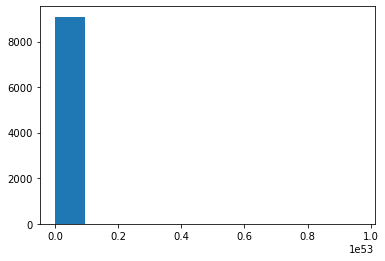

In [ ]:
## X and y-scale here are much larger
plt.hist(transformed_exp['car_age'])

In [39]:
transformed_exp['odometer']

19957     67272.0
5329      27249.0
10075     12562.0
6175     136060.0
270      137446.0
           ...   
19864    123041.0
9118      76194.0
9457        696.0
1536      79165.0
12741     12880.0
Name: odometer, Length: 9089, dtype: float64

# Box-Cox Transformation
The Box-Cox transformation is a transformation that helps your dataset follow a normal distribution. Typically, we use Box-Cox transformation when our dataset is not normal, but close to being normal. When we want to either run tests or generate significance from our dataset, Box-Cox transformation is a good option to transform our target variable so it resembles a normal distribution.

Box-Cox aggregates multiple power transformers into a single transformer. You use lambda to adjust the transformation. Lambda varies from -5 to 5. If we set lambda equal to zero, it becomes simply a log transformation.

In [40]:
## Redo the pipeline for this example
from sklearn.model_selection import train_test_split

## Clip Outliers
df_example = df_example[df_example['price'] < np.percentile(df_example['price'], 95)]

## Remove prices that are 0 to make notebook work
df_example = df_example[df_example['price'] > 0].copy()

X = df_example.drop('price',axis =1 )
y = df_example[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([1018., 1575., 1155.,  892.,  791.,  597.,  653.,  609.,  514.,
         476.]),
 array([1.00000e+00, 4.00090e+03, 8.00080e+03, 1.20007e+04, 1.60006e+04,
        2.00005e+04, 2.40004e+04, 2.80003e+04, 3.20002e+04, 3.60001e+04,
        4.00000e+04]),
 <BarContainer object of 10 artists>)

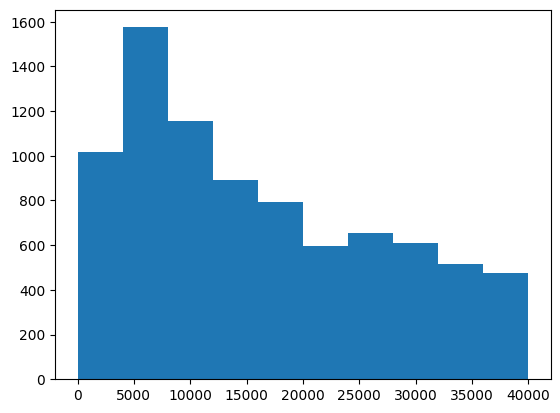

In [41]:
plt.hist(y_train['price'])

We'll apply a boxcox transformation to make this dataset a bit more normal. Within scipy.stats, we can set lmbda = None and the boxcox function will find the lambda value that will maximize the log-likelihood function of the dataset:

(array([  92.,  156.,  423.,  938., 1341., 1099., 1065.,  975., 1134.,
        1057.]),
 array([  0.        ,  29.77344456,  59.54688912,  89.32033368,
        119.09377824, 148.86722279, 178.64066735, 208.41411191,
        238.18755647, 267.96100103, 297.73444559]),
 <BarContainer object of 10 artists>)

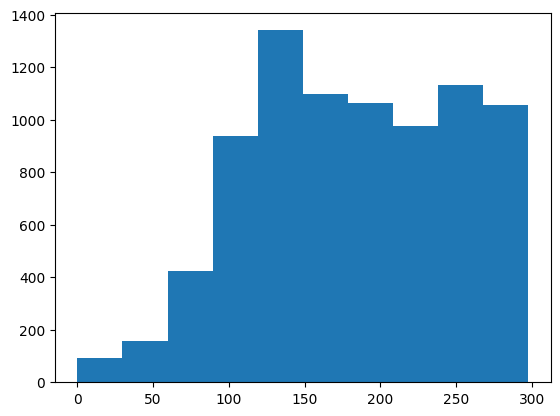

In [42]:
from scipy.stats import boxcox

boxcox_y_train = boxcox(y_train['price'], lmbda = None)

plt.hist(boxcox_y_train[0])

In [43]:
print("Lambda Parameter {0}".format(boxcox_y_train[1]))

Lambda Parameter 0.46621049817757765


# Feature Interactions
Like a chef remixing their ingredients, as a data scientist, we have a ton of different ways we can engineer features with our variables. Here are a few common methods:

- Arethmetic Interaction (addition, subtraction, division, or multiplication of variables)
- Binning (grouping variables in ranges)
- Creative Features (alternative metrics for evaluation)

## Arethmetic Interaction
We actually already did some arethmetic interaction at the beginning of our analysis here. One of the earliest things we did was get the car age by taking the difference between the newest eyar and the year of each vehicle. While this is interaction with the variable itself, we can also take differences, ratios and mutliples of two or more variables. Let's try a few:

In [44]:
#first example of getting car's age:
df['car_age'] = df['year'].max() - df['year']

#let's look at price per mile. This could be a good way to normalize across different car brands
df['price_per_mile'] = df['price']/ df['odometer']

#We can try these newly created features in our model to see if they produce better results.

## Binning
Binning allows us to group specific variables in a range. This can be useful if we know something specific or non-linear about the data at hand. For example, if most cars go out of warranty at 50,000 miles or after 5 years, we can create a varaible bin based on that.

We can also split data into multiple ranges if we would like to.

In [45]:
#create warranty bin > 50,000 miles
# we are using a lambda function here. This lets us write a function without defining it
# we are also using a ternary operator which is an if, else statement in a single line. (explained in the full video)

df['warranty_miles'] = df['odometer'].apply(lambda x: 0 if (x > 50000 or np.isnan(x)) else 1)
df['warranty_age'] = df['car_age'].apply(lambda x: 0 if (x > 5 or np.isnan(x)) else 1)


# We can also combine these together in a single statement by defining a function.
def warranty(miles, age):
    if (miles > 50000 or age > 5):
        return 0
    else:
        return 1

df['warranty'] = df.apply(lambda x: min(x.warranty_miles,x.warranty_age), axis=1)


In [46]:
df.loc[:,['odometer','car_age','warranty_miles','warranty_age','warranty']].dropna().head()

,odometer,car_age,warranty_miles,warranty_age,warranty
0,84000.0,16.0,0,0,0
1,85971.0,11.0,0,0,0
2,170000.0,18.0,0,0,0
3,78664.0,9.0,0,0,0
4,140000.0,16.0,0,0,0


In [47]:
#We might also know that cars lose value non-linearly after 50k miles or 100k miles.
#In this case, we may want to create bucks for <50k, 50k-100k, and 100k+ miles.
#we did something similiar in the eda notebook located here: https://www.kaggle.com/code/kenjee/basic-eda-example
bins = pd.IntervalIndex.from_tuples([(0, 50000), (50000, 100000), (100000,float("inf"))])
df['mile_groups'] = pd.cut(df['odometer'],bins)

## Creative features
Often, we have a good subject area understanding of our data domain. We might want to create features based on our understanding of the specific problem or domain. For cars, maybe we could create our own classification of imports or US manufactured cars that could help us predict pricing better. Maybe there is a car desirabity metric that you could create based on the other factors. Or maybe there is a way to look at the amount of similar cars close by to approximate demand. These are some potential ideas for you to implement yourself!

Another way to get creative features are to find more data and add it to your dataset. We could find a car sales website and scrape the average price of the cars in the market based on the make and model.

# Summary
In this notebook, we covered the basics of feature scaling, transformations and interaction features. Working on these techiniques should help you to improve your models significantly!
## Feature Scaling
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler
## Transformations
- Logarithmic
- Square Root
- Exponential
- Box-Cox
## Interaction Features
- Arethmetic Interaction
- Binning
- Creative Features

## Additional Resources
- [About Feature Scaling and Normalization by Sebastian Raschka](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
- [Feature Scaling Techniques in Python – A Complete Guide by Eddie_4072](https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/)
- [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization by Aniruddha Bhandari](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=Normalization%20is%20a%20scaling%20technique,known%20as%20Min%2DMax%20scaling.&text=Here%2C%20Xmax%20and%20Xmin%20are,values%20of%20the%20feature%20respectively.)
- [Robust Scaler - Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
- [Log Transformation: Purpose and Interpretation by Kyaw Saw Htoon](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)
- [Best exponential transformation to linearize your data with Scipy](https://towardsdatascience.com/best-exponential-transformation-to-linearize-your-data-with-scipy-cca6110313a6)
- [Exponentially scaling your data in order to zoom in on small differences](https://rikunert.com/exponential_scaler)
- [Box Cox Transformation by Ted Hessing](https://sixsigmastudyguide.com/box-cox-transformation/)
- [Box-Cox Transformation and Target Variable: Explained](https://builtin.com/data-science/box-cox-transformation-target-variable)
- [Additional Kaggle Example](https://www.kaggle.com/code/mysarahmadbhat/all-about-feature-scaling)

## Related Course Workbooks - Machine Learning Process A-Z
- [**Dealing with Missing Values - Section 5.1**](https://colab.research.google.com/drive/1P-4i_T1UE8_PLZibNApGbGPDxhOJDnd8?usp=sharing)
- [**Dealing with Outliers - Section 5.2**](https://colab.research.google.com/drive/1e_9VUn48sOebsEmDMRZ2R7OEkJLM9Zxt?usp=sharing)
- [**Basic EDA Example - Section 6**](https://colab.research.google.com/drive/18sWPkf2o6yX2RJu0YRZRCbJqNzc5q8ZS?usp=sharing)
- [**Categorical Feature Engineering - Section 7.1**](https://colab.research.google.com/drive/1F94kWYM_GTb-Neh_jCte04BxfcUdBodn?usp=sharing)
- [**Numeric Feature Engineering - Section 7.2**](https://colab.research.google.com/drive/1SGwguOuloOG7nd3OoOGBALR9jOg26UNt?usp=sharing)
- [**Cross Validation Foundations - Section 8**](https://colab.research.google.com/drive/1xsVT5MWAX1Yq8KXMPbqU6DBti-NN17YH?usp=sharing)
- [**Feature Selection - Section 9**](https://colab.research.google.com/drive/19uXC7Cm_K1FDTjkcRVjxcAY4f7dv6LDV?usp=sharing)
- [**Dealing with Imbalanced Data - Section 10**](https://colab.research.google.com/drive/1pulqugw0V1xyoMbQrB3aTdlwO0KDXDFf?usp=sharing)
- [**Model Building Example - Section 11**](https://colab.research.google.com/drive/1oV675pKGmCLIYE44a_Quw1s66c4LVcOq?usp=sharing)
- [**Model Evaluation (Classification) - Section 12**](https://colab.research.google.com/drive/1FYHAL3lbv7Rdh3EV9TooMFkPNv6MEJly?usp=sharing)
- [**Model Evlauation (Regression) - Section 12**](https://colab.research.google.com/drive/1_of9a48P-rGkrS8US9YgwQm_58_1unAV?usp=sharing)